<h1 style="color: #FF8C00;">00 Libraries |</h1>

In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy import stats
import math
import statsmodels.api as sm
import statsmodels.formula.api as smf
from datetime import datetime
from sklearn.linear_model import Ridge

This dataset comprises one-year data (from May 2014 to May 2015) of house sale prices across King County, including Seattle. It features 21 different columns, providing a comprehensive overview of the real estate market:

- **id**: A unique identifier for a house.
- **date**: The date on which the house was sold.
- **price**: The sale price of the house (prediction target).
- **bedrooms**: Number of bedrooms in the house.
- **bathrooms**: Number of bathrooms in the house, per bedroom.
- **sqft_living**: Square footage of the interior living space.
- **sqft_lot**: Square footage of the land space.
- **floors**: Number of floors (levels) in the house.
- **waterfront**: Whether the house has a waterfront view.
- **view**: Number of times the house has been viewed.
- **condition**: The overall condition of the house.
- **grade**: The overall grade given to the house, based on the King County grading system.
- **sqft_above**: Square footage of the house apart from the basement.
- **sqft_basement**: Square footage of the basement.
- **yr_built**: The year the house was built.
- **yr_renovated**: The year the house was renovated.
- **zipcode**: ZIP code area.
- **lat**: Latitude coordinate.
- **long**: Longitude coordinate.
- **sqft_living15**: The interior living space for the nearest 15 neighbors in 2015.
- **sqft_lot15**: The land spaces for the nearest 15 neighbors in 2015.

**TARGET --> Price**: Our primary focus is to understand which features most significantly impact the house price. Additionally, we aim to explore properties valued at $650K and above for more detailed insights.


<h1 style="color: #FF8C00;">01 | Data Extraction </h1>

In [237]:
data = pd.read_csv(r"C:\Users\Darkos\Desktop\Labs\WEEK_5_Machine_Learning\Ironkaggle project\king_ country_ houses_aa.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


<h2 style="color: #FF6347;">Exploring the Data (First impression)</h2>

In [238]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [239]:
data.shape

(21613, 21)

In [240]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [241]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [242]:
data.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [243]:
data['date_fixed'] = pd.to_datetime(data['date'], format="%Y%m%dT%H%M%S").dt.date

In [244]:
data.drop(columns = "date", inplace = True)

In [245]:
data = data.rename(columns={'date_fixed': 'date'})


In [246]:
data.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014-10-13
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014-12-09
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015-02-25
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014-12-09
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015-02-18


<h2 style="color: #FF6347;">Columns standardization</h2>

In [247]:
data.columns = [column.lower().replace(" ", "_") for column in data.columns]
data.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014-10-13
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014-12-09
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015-02-25
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014-12-09
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015-02-18


<h2 style="color: #FF6347;">Copy as best practices</h2>

In [248]:
df = data.copy()
df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014-10-13
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014-12-09
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015-02-25
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014-12-09
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015-02-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,2014-05-21
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,2015-02-23
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,2014-06-23
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,2015-01-16


<h1 style="color: #FF8C00;">02 | Data Cleaning </h1>

<h2 style="color: #FF6347;">Dealing with Data types</h2>

In [249]:
df.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
date              object
dtype: object

<h2 style="color: #FF6347;">Dealing with NaN values</h2>

In [250]:
df.isna().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
date             0
dtype: int64

<h2 style="color: #FF6347;">Dealing with Duplicates</h2>

In [251]:
df.duplicated().sum()

0

<h2 style="color: #FF6347;">Dealing with Empty Spaces</h2>

In [252]:
#EQ significa equal.
data.eq(" ").sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
date             0
dtype: int64

<h1 style="color: #FF8C00;">03 | EDA </h1>

<h2 style="color: #FF6347;">Descriptive Statistics</h2>

In [253]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [254]:
#siempre sacamos un nunique a los string o integers nunca a un float
df.bedrooms.nunique()

13

In [255]:
df.waterfront.nunique()

2

In [256]:
df.waterfront.unique()

array([0, 1], dtype=int64)

In [257]:
df.waterfront.value_counts()

waterfront
0    21450
1      163
Name: count, dtype: int64

In [258]:
df.view.nunique()

5

In [259]:
df.view.unique()

array([0, 3, 4, 2, 1], dtype=int64)

In [260]:
df.view.value_counts()

view
0    19489
2      963
3      510
1      332
4      319
Name: count, dtype: int64

In [261]:
df.condition.nunique()

5

In [262]:
df.condition.unique()

array([3, 5, 4, 1, 2], dtype=int64)

In [263]:
df.condition.value_counts()

condition
3    14031
4     5679
5     1701
2      172
1       30
Name: count, dtype: int64

<h2 style="color: #FF6347;">Checking Distributions</h2>

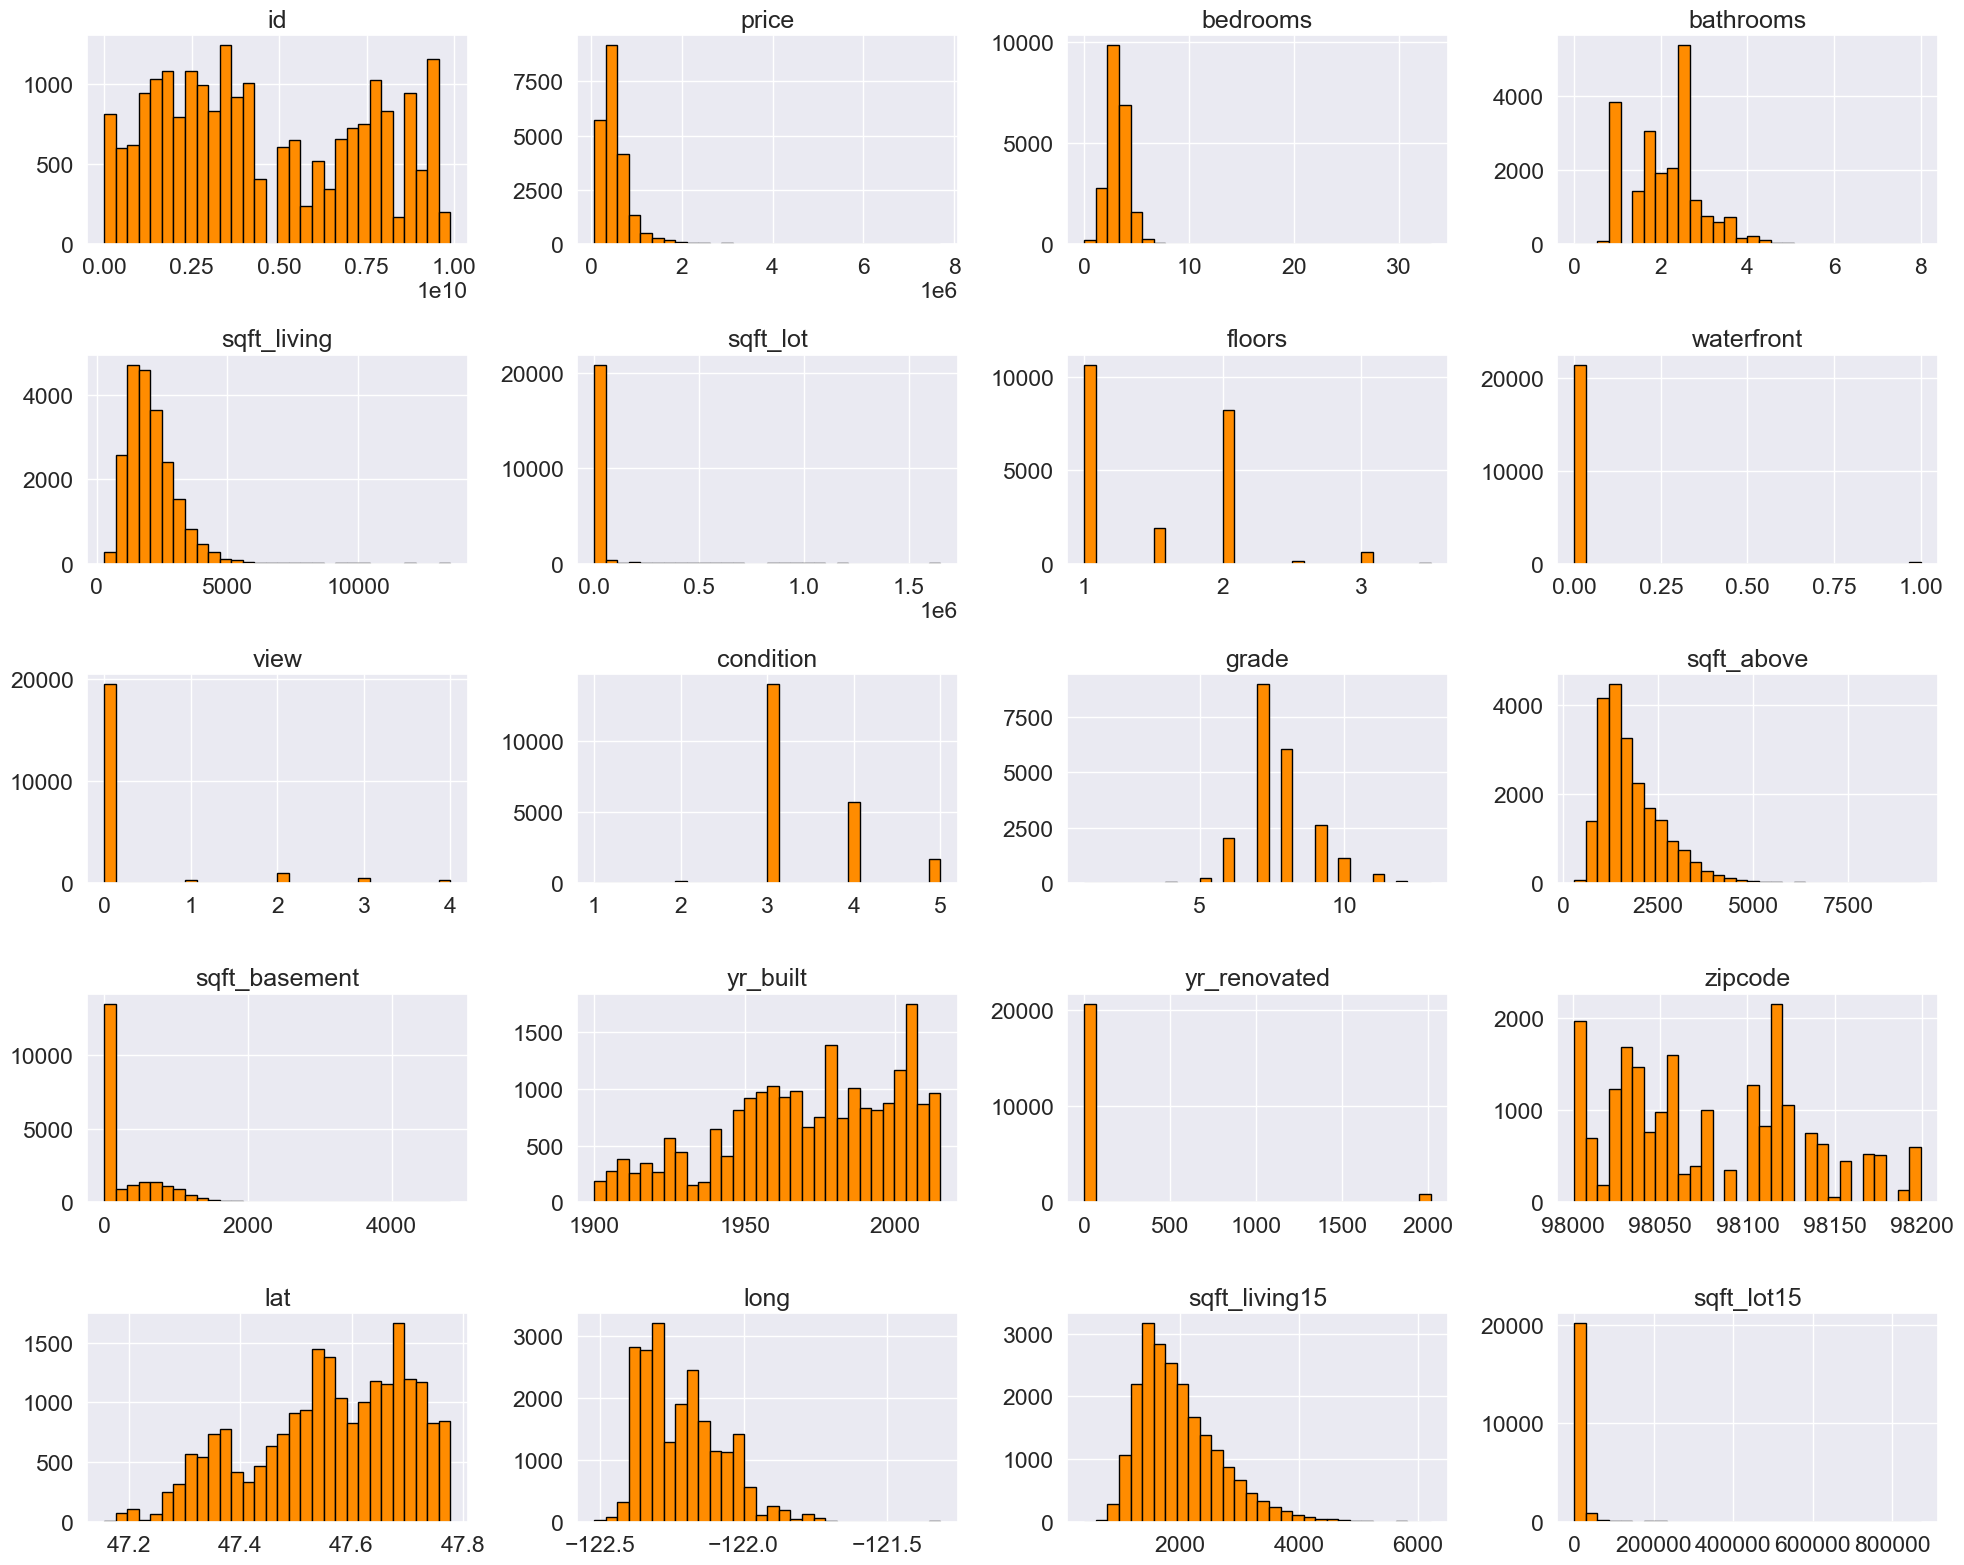

In [264]:
color = '#FF8C00'

# grid size
nrows, ncols = 5, 4  # adjust for your number of features

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

# Plot each numerical feature
for i, ax in enumerate(axes):
    if i >= len(df.columns):
        ax.set_visible(False)  # hide unesed plots
        continue
    ax.hist(df.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(df.columns[i])

plt.tight_layout()
plt.show()

<h3 style="color: #FF6347;">Checking our target distribution (Price)</h3>

In [265]:
df.price.describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

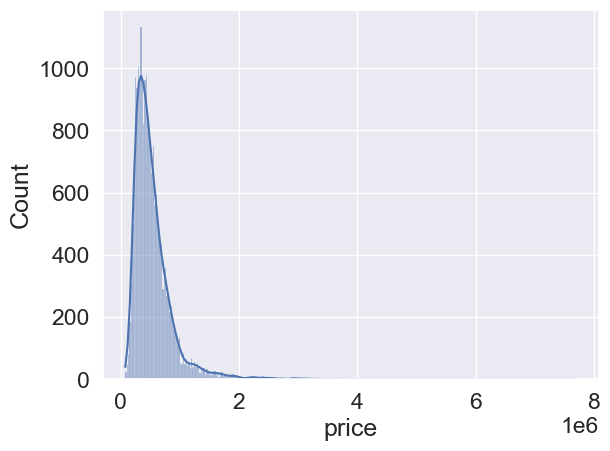

In [266]:
sns.histplot(df["price"],kde = True)

In [267]:
#Ponemos el ID como indice.
df = df.set_index("id") 

<h2 style="color: #FF6347;">Checking Outliers</h2>

In [268]:
df_sinfecha = df.drop(columns=["date","condition","bathrooms"]) 

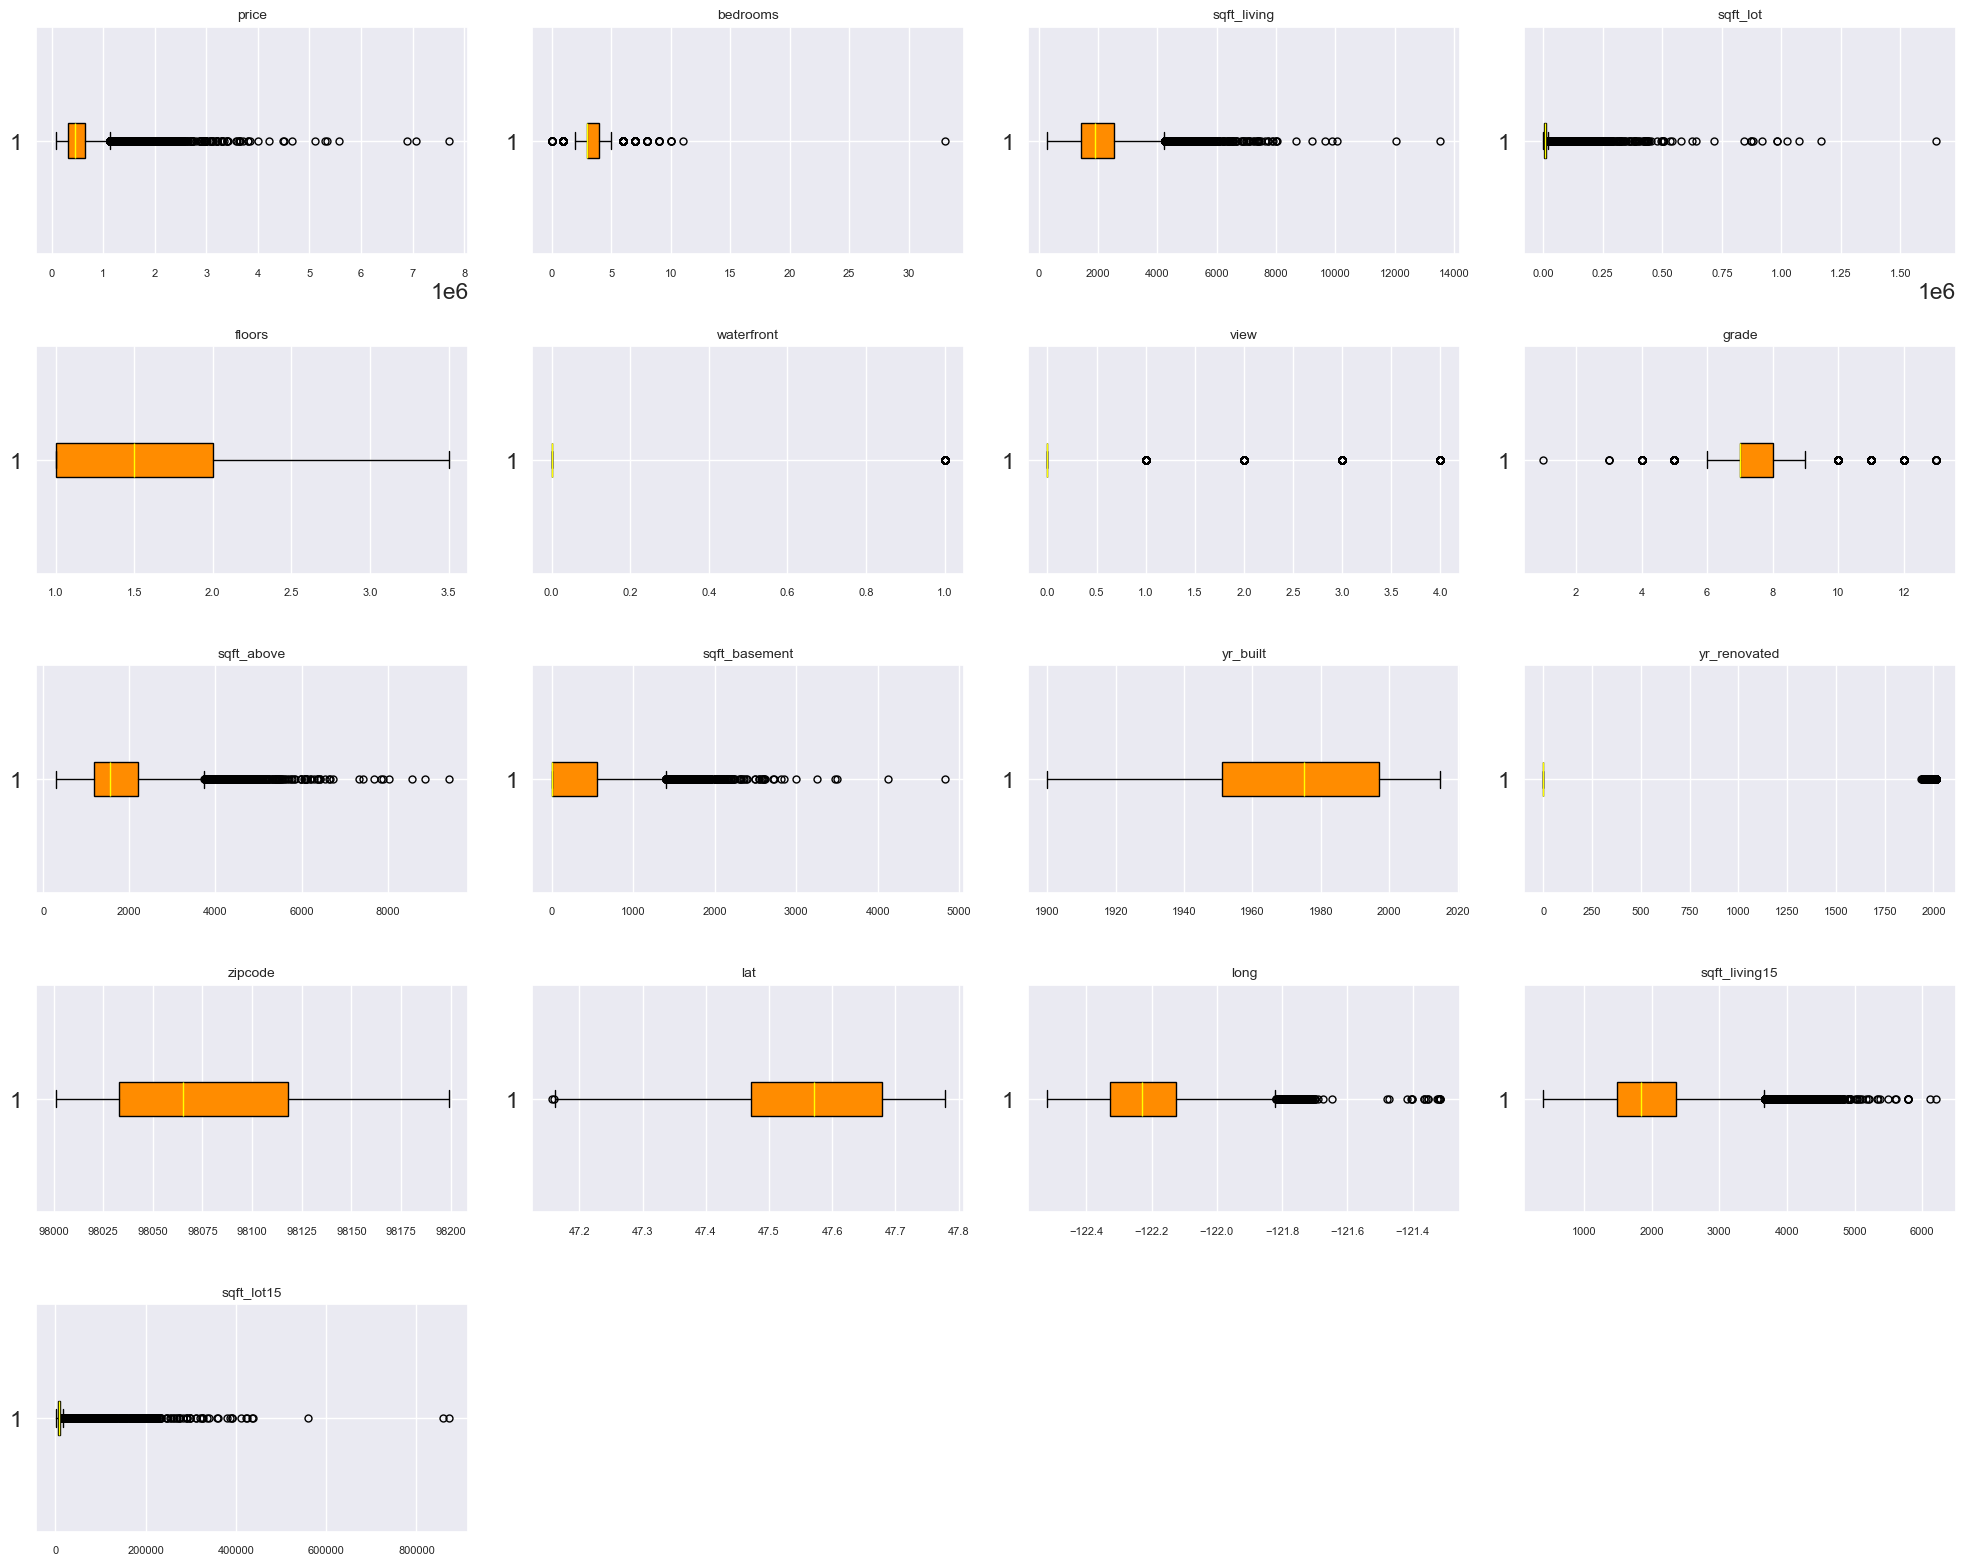

In [269]:
color = '#FF8C00'

# grid size
nrows, ncols = 5, 4 

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= len(df_sinfecha.columns):
        ax.set_visible(False)
        continue
    ax.boxplot(df_sinfecha.iloc[:, i].dropna(), vert=False, patch_artist=True, 
               boxprops=dict(facecolor=color, color='black'), 
               medianprops=dict(color='yellow'), whiskerprops=dict(color='black'), 
               capprops=dict(color='black'), flierprops=dict(marker='o', color='red', markersize=5))
    ax.set_title(df_sinfecha.columns[i], fontsize=10)
    ax.tick_params(axis='x', labelsize=8)

plt.tight_layout()

plt.show()

<h2 style="color: #FF6347;">Looking for Correlations</h2>

In [270]:
num_corr_sinfecha= df_sinfecha.corr().round(2)
num_corr_sinfecha

,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.00,0.31,0.70,0.09,0.26,0.27,0.40,0.67,0.61,0.32,0.05,0.13,-0.05,0.31,0.02,0.59,0.08
bedrooms,0.31,1.00,0.58,0.03,0.18,-0.01,0.08,0.36,0.48,0.30,0.15,0.02,-0.15,-0.01,0.13,0.39,0.03
sqft_living,0.70,0.58,1.00,0.17,0.35,0.10,0.28,0.76,0.88,0.44,0.32,0.06,-0.20,0.05,0.24,0.76,0.18
sqft_lot,0.09,0.03,0.17,1.00,-0.01,0.02,0.07,0.11,0.18,0.02,0.05,0.01,-0.13,-0.09,0.23,0.14,0.72
floors,0.26,0.18,0.35,-0.01,1.00,0.02,0.03,0.46,0.52,-0.25,0.49,0.01,-0.06,0.05,0.13,0.28,-0.01
waterfront,0.27,-0.01,0.10,0.02,0.02,1.00,0.40,0.08,0.07,0.08,-0.03,0.09,0.03,-0.01,-0.04,0.09,0.03
view,0.40,0.08,0.28,0.07,0.03,0.40,1.00,0.25,0.17,0.28,-0.05,0.10,0.08,0.01,-0.08,0.28,0.07
grade,0.67,0.36,0.76,0.11,0.46,0.08,0.25,1.00,0.76,0.17,0.45,0.01,-0.18,0.11,0.20,0.71,0.12
sqft_above,0.61,0.48,0.88,0.18,0.52,0.07,0.17,0.76,1.00,-0.05,0.42,0.02,-0.26,-0.00,0.34,0.73,0.19
sqft_basement,0.32,0.30,0.44,0.02,-0.25,0.08,0.28,0.17,-0.05,1.00,-0.13,0.07,0.07,0.11,-0.14,0.20,0.02


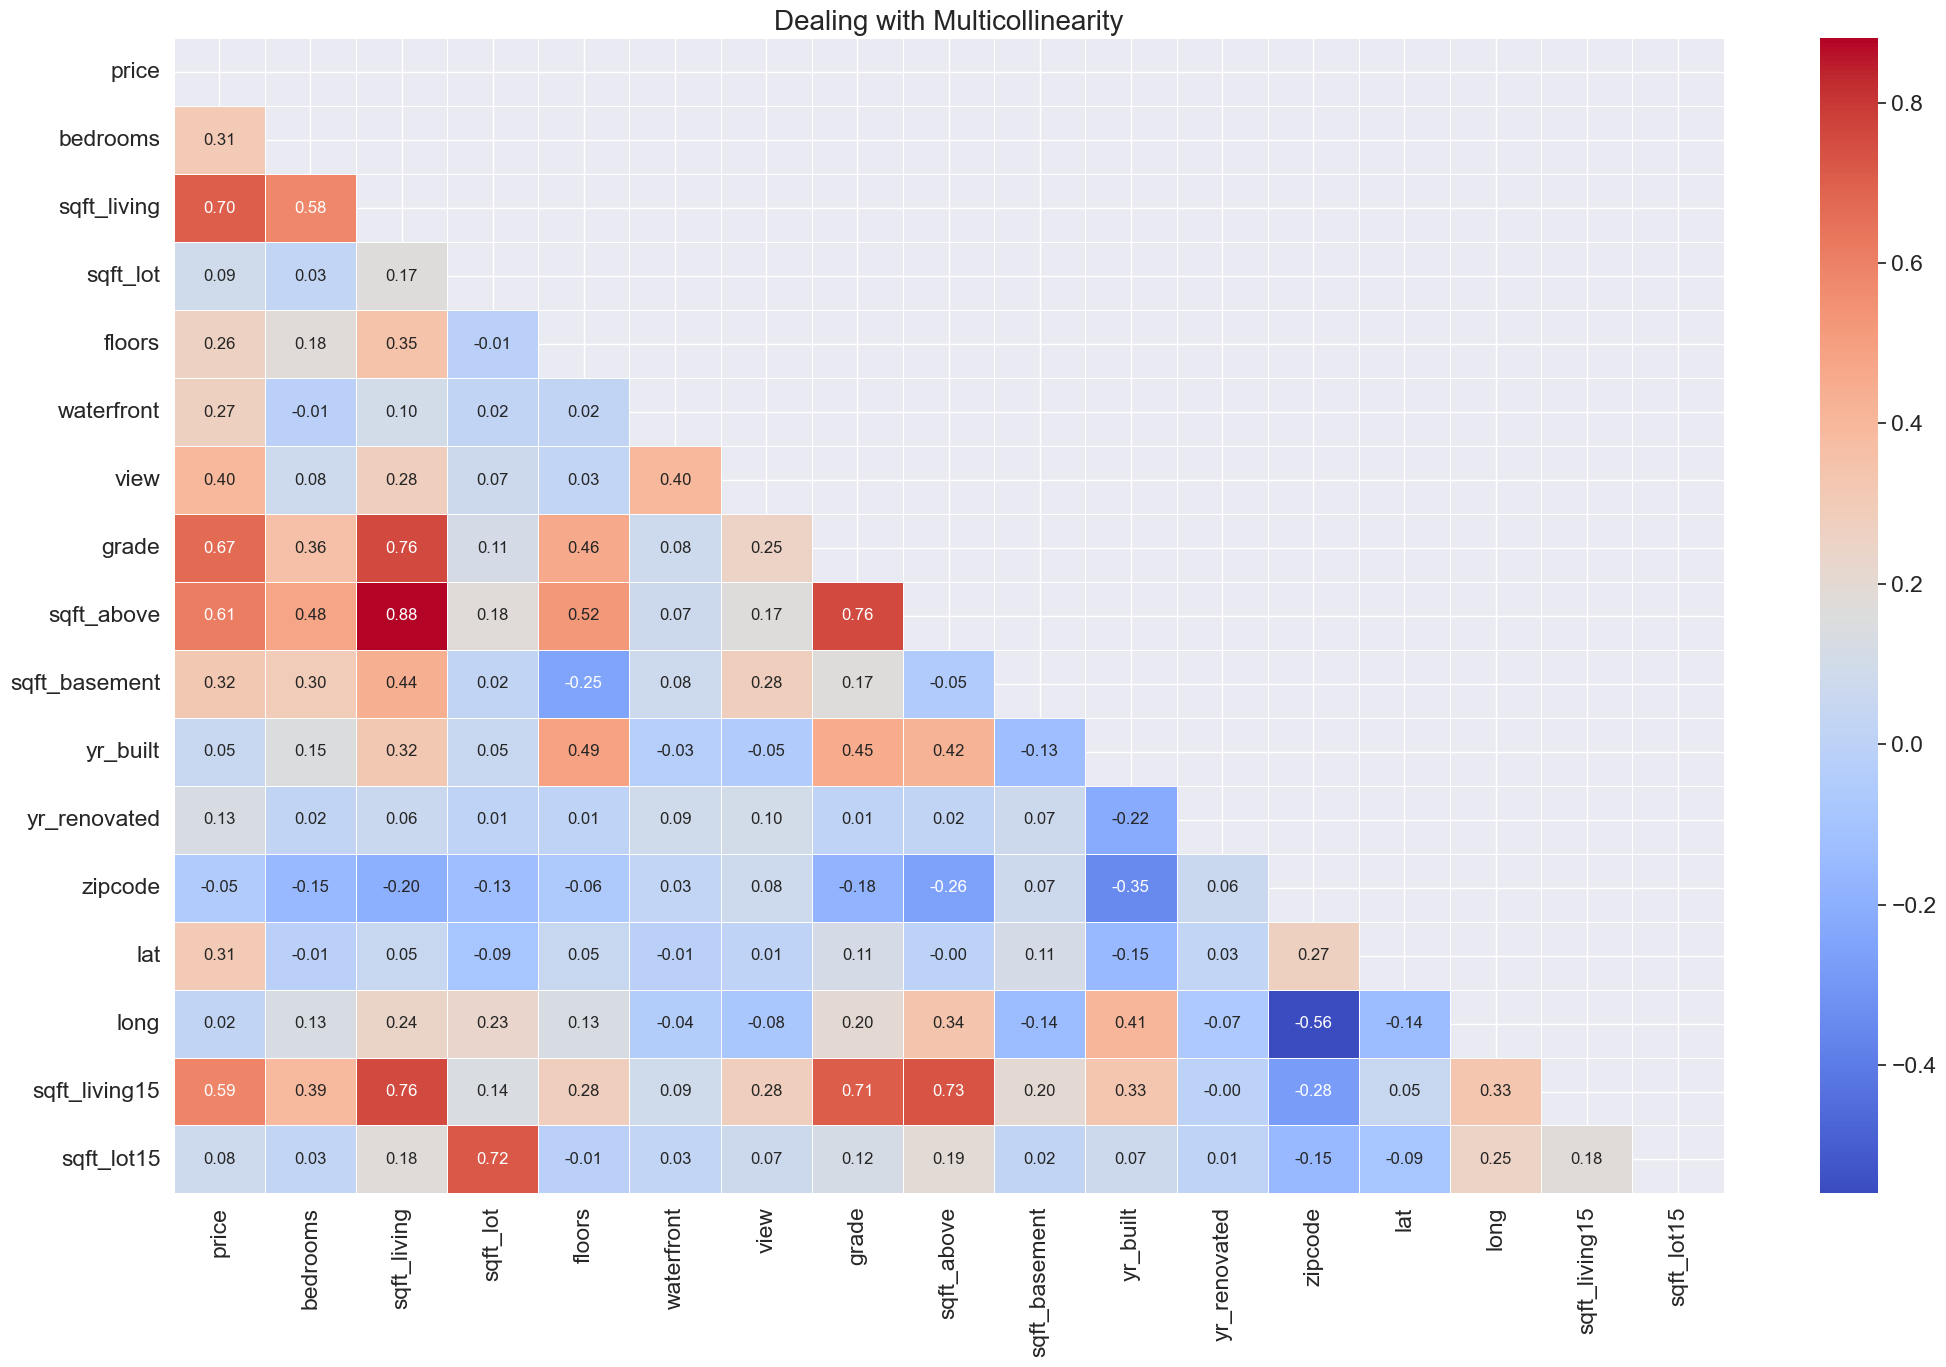

In [271]:
# Correlation Matrix-Heatmap Plot
mask = np.zeros_like(num_corr_sinfecha) #para quitar los 1 con 1.
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

f, ax = plt.subplots(figsize=(25, 15))
sns.set(font_scale=1.5) # increase font size


ax = sns.heatmap(num_corr_sinfecha, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Dealing with Multicollinearity", fontsize=20) # add title
plt.show()

<h1 style="color: #FF8C00;">04 | Data Preprocessing </h1>

<h2 style="color: #FF6347;">X-y Split con el DF TOTAL</h2>

In [272]:
y = df_sinfecha["price"]
X = df_sinfecha.drop(columns = "price") #aqui no pongo el inplace=True para que asi no me modifique mi df, solo lo estoy asignando a mi variable.

<h1 style="color: #FF8C00;">05 | Modeling </h1>

<h2 style="color: #FF6347;">Train-Test Split</h2>

In [273]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [274]:
print(f'100% of our data: {len(df)}.')
print(f'70% for training data: {len(X_train)}.') 
print(f'30% for test data: {len(X_test)}.')

100% of our data: 21613.
70% for training data: 15129.
30% for test data: 6484.


<h2 style="color: #FF6347;">Selecting the Model: Linear Regression</h2>

In [275]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [276]:
predictions = model.predict(X_test)

In [277]:
print(f'30% for test prediction data: {len(predictions)}.')

30% for test prediction data: 6484.


<h3 style="color: #FF6347;">Metrics</h3>

In [278]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [279]:
r2 = r2_score(y_test, predictions) 
RMSE = mean_squared_error(y_test, predictions, squared=False)
MSE = mean_squared_error(y_test, predictions)
MAE = mean_absolute_error(y_test, predictions)

c:\Users\Darkos\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [280]:
print("R2 = ", round(r2, 4))
print("RMSE = ", round(RMSE, 4))
print("The value of the metric MSE is ", round(MSE, 4))
print("MAE = ", round(MAE, 4))

R2 =  0.6943
RMSE =  210062.4242
The value of the metric MSE is  44126222055.6002
MAE =  129017.7755


<h1 style="color: #FF8C00;">06 | Trying other Models</h1>

<h2 style="color: #FF6347;">Selecting the Model: Ridge Regression</h2>

In [281]:
ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge()

<h2 style="color: #FF6347;">Model Validation</h2>

In [282]:
predictions_ridge = ridge.predict(X_test)

<h3 style="color: #FF6347;">Metrics</h3>

In [283]:
r2_ridge = r2_score(y_test, predictions_ridge)
RMSE_ridge = mean_squared_error(y_test, predictions_ridge, squared=False)
MSE_ridge = mean_squared_error(y_test, predictions_ridge)
MAE_ridge = mean_absolute_error(y_test, predictions_ridge)

c:\Users\Darkos\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [284]:
#Printing the results
print("R2 = ", round(r2_ridge, 4))
print("RMSE = ", round(RMSE_ridge, 4))
print("The value of the metric MSE is ", round(MSE_ridge, 4))
print("MAE = ", round(MAE_ridge, 4))

R2 =  0.6943
RMSE =  210094.6437
The value of the metric MSE is  44139759317.7594
MAE =  129012.1805


<h2 style="color: #FF6347;">Selecting the Model: Lasso Regression</h2>

In [285]:
from sklearn.linear_model import Lasso

In [286]:
lasso = Lasso()
lasso.fit(X_train, y_train)

c:\Users\Darkos\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.730e+14, tolerance: 1.977e+11
  model = cd_fast.enet_coordinate_descent(


Lasso()

<h2 style="color: #FF6347;">Model Validation</h2>

In [287]:
predictions_lasso = lasso.predict(X_test)

<h3 style="color: #FF6347;">Metrics</h3>

In [288]:
r2_lasso = r2_score(y_test, predictions_lasso)
RMSE_lasso = mean_squared_error(y_test, predictions_lasso, squared=False)
MSE_lasso = mean_squared_error(y_test, predictions_lasso)
MAE_lasso = mean_absolute_error(y_test, predictions_lasso)

c:\Users\Darkos\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [289]:
#Printing the results
print("R2 = ", round(r2_lasso, 4))
print("RMSE = ", round(RMSE_lasso, 4))
print("The value of the metric MSE is ", round(MSE_lasso, 4))
print("MAE = ", round(MAE_lasso, 4))

R2 =  0.6943
RMSE =  210063.5016
The value of the metric MSE is  44126674713.7753
MAE =  129017.3257


<h2 style="color: #FF6347;">Selecting the Model: Decision Tree Regression</h2>

In [290]:
from sklearn.tree import DecisionTreeRegressor

In [291]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

DecisionTreeRegressor()

<h2 style="color: #FF6347;">Model Validation</h2>

In [292]:
predictions_tree = tree.predict(X_test)

<h3 style="color: #FF6347;">Metrics</h3>

In [293]:
r2_tree = r2_score(y_test, predictions_tree)
RMSE_tree = mean_squared_error(y_test, predictions_tree, squared=False)
MSE_tree = mean_squared_error(y_test, predictions_tree)
MAE_tree = mean_absolute_error(y_test, predictions_tree)

c:\Users\Darkos\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [294]:
#Printing the results
print("R2 = ", round(r2_tree, 4))
print("RMSE = ", round(RMSE_tree, 4))
print("The value of the metric MSE is ", round(MSE_tree, 4))
print("MAE = ", round(MAE_tree, 4))

R2 =  0.7515
RMSE =  189417.4372
The value of the metric MSE is  35878965532.3739
MAE =  101799.9745


<h2 style="color: #FF6347;">Selecting the Model: KNN Regression</h2>

In [295]:
from sklearn.neighbors import KNeighborsRegressor

In [296]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

<h2 style="color: #FF6347;">Model Validation</h2>

In [297]:
predictions_knn = knn.predict(X_test)

<h3 style="color: #FF6347;">Metrics</h3>

In [298]:
r2_knn = r2_score(y_test, predictions_knn)
RMSE_knn = mean_squared_error(y_test, predictions_knn, squared=False)
MSE_knn= mean_squared_error(y_test, predictions_knn)
MAE_knn = mean_absolute_error(y_test, predictions_knn)

c:\Users\Darkos\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [299]:
#Printing the results
print("R2 = ", round(r2_knn, 4))
print("RMSE = ", round(RMSE_knn, 4))
print("The value of the metric MSE is ", round(MSE_knn, 4))
print("MAE = ", round(MAE_knn, 4))

R2 =  0.4932
RMSE =  270487.2459
The value of the metric MSE is  73163350196.9755
MAE =  164981.0821


<h2 style="color: #FF6347;">Selecting the Model: XGBoost Regression</h2>

In [300]:
import xgboost as xgb

In [301]:
xgbr = xgb.XGBRFRegressor()
xgbr.fit(X_train, y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

<h2 style="color: #FF6347;">Model Validation</h2>

In [302]:
predictions_xgb = xgbr.predict(X_test)

<h3 style="color: #FF6347;">Metrics</h3>

In [303]:
r2_xgb = r2_score(y_test, predictions_xgb)
RMSE_xgb = mean_squared_error(y_test, predictions_xgb, squared=False)
MSE_xgb = mean_squared_error(y_test, predictions_xgb)
MAE_xgb = mean_absolute_error(y_test, predictions_xgb)

c:\Users\Darkos\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [304]:
#Printing the results
print("R2 = ", round(r2_xgb, 4))
print("RMSE = ", round(RMSE_xgb, 4))
print("The value of the metric MSE is ", round(MSE_xgb, 4))
print("MAE = ", round(MAE_xgb, 4))

R2 =  0.8013
RMSE =  169372.5896
The value of the metric MSE is  28687074094.4405
MAE =  97471.692


<h2 style="color: #FF6347;">Final Comparision</h2>

In [305]:
metrics = {
    'Model': ['Linear Regression', 'Ridge', 'Lasso', 'Decision Tree', 'KNN', 'XGBoost'],
    'R²': [r2, r2_ridge, r2_lasso, r2_tree, r2_knn, r2_xgb],
    'RMSE': [RMSE, RMSE_ridge, RMSE_lasso, RMSE_tree, RMSE_knn, RMSE_xgb],
    'MSE': [MSE, MSE_ridge, MSE_lasso, MSE_tree, MSE_knn, MSE_xgb],
    'MAE': [MAE, MAE_ridge, MAE_lasso, MAE_tree, MAE_knn, MAE_xgb]
}

In [306]:
df_metrics = pd.DataFrame(metrics)
df_metrics.set_index("Model").T

Model,Linear Regression,Ridge,Lasso,Decision Tree,KNN,XGBoost
R²,6.943459e-01,6.942521e-01,6.943428e-01,7.514731e-01,4.932111e-01,8.012900e-01
RMSE,2.100624e+05,2.100946e+05,2.100635e+05,1.894174e+05,2.704872e+05,1.693726e+05
MSE,4.412622e+10,4.413976e+10,4.412667e+10,3.587897e+10,7.316335e+10,2.868707e+10
MAE,1.290178e+05,1.290122e+05,1.290173e+05,1.018000e+05,1.649811e+05,9.747169e+04


<h2 style="color: #FF6347;">Normalization with MinMaxScaler</h2>

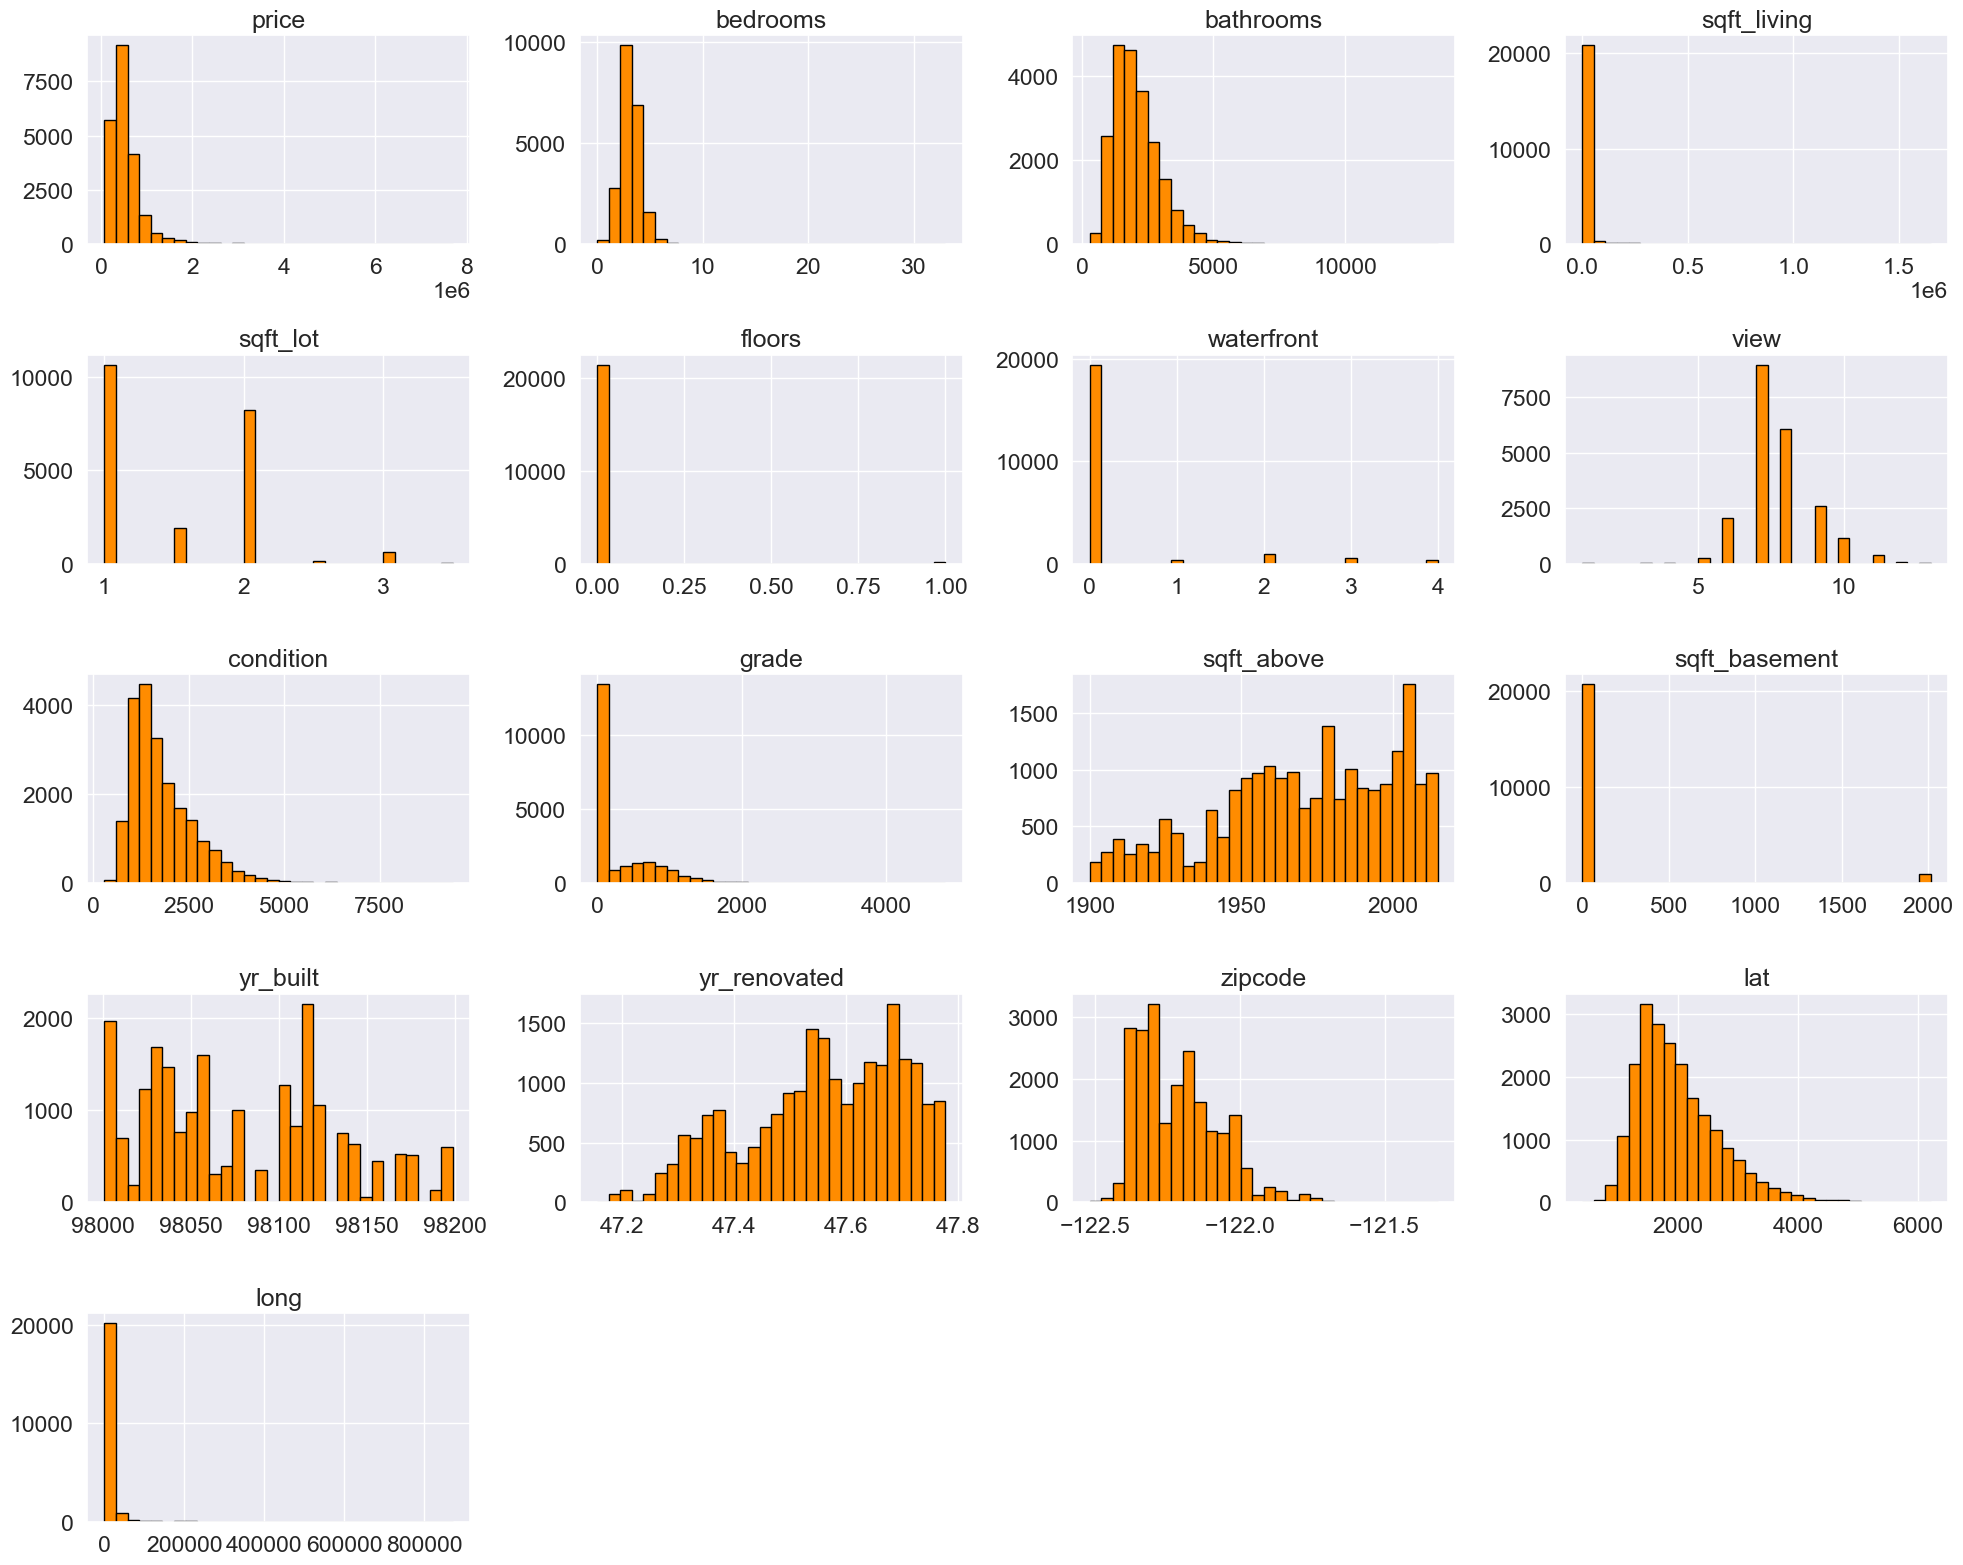

In [307]:
color = '#FF8C00'

# grid size
nrows, ncols = 5, 4  # adjust for your number of features

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

# Plot each numerical feature
for i, ax in enumerate(axes):
    if i >= len(df_sinfecha.columns):
        ax.set_visible(False)  # hide unesed plots
        continue
    ax.hist(df_sinfecha.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(df.columns[i])

plt.tight_layout()
plt.show()

In [308]:
from sklearn.preprocessing import MinMaxScaler 

In [309]:
scaler = MinMaxScaler() 

In [310]:
#el transform lo hago para ver si asi mejora mi modelo al comprimir los valores de 0 a 1
#porque lo tenemos en dolares 
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test)

In [311]:
xgbr = xgb.XGBRegressor()
xgbr.fit(X_train_scaled, y_train) #aqui me esta tomando valores entre 0 y 1

predictions_xgb_2 = xgbr.predict(X_test_scaled) #esta tomando valores entre 0 y 1

In [312]:
#La Y (target) no la transformo porque ya esta en las unidades originales, asi despues no tengo que cambiar todo otra vez a unidades originales. 
r2_scaler = r2_score(y_test, predictions_xgb_2)
RMSE_scaler = mean_squared_error(y_test, predictions_xgb_2, squared=False)
MSE_scaler = mean_squared_error(y_test, predictions_xgb_2)
MAE_scaler = mean_absolute_error(y_test, predictions_xgb_2)

#Printing the results
print("R2 = ", round(r2_scaler, 4))
print("RMSE = ", round(RMSE_scaler, 4))
print("The value of the metric MSE is ", round(MSE_scaler, 4))
print("MAE = ", round(MAE_scaler, 4))

R2 =  0.8653
RMSE =  139456.5245
The value of the metric MSE is  19448122218.8982
MAE =  73254.0347


c:\Users\Darkos\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


<h2 style="color: #FF6347;">Normalization with StandardScaler</h2>

In [313]:
from sklearn.preprocessing import StandardScaler

In [314]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [315]:
xgbr.fit(X_train_scaled, y_train)
predictions_xgb_2 = xgbr.predict(X_test_scaled)

In [316]:
r2_xg_stand = r2_score(y_test, predictions_xgb_2)
RMSE_xg_stand = mean_squared_error(y_test, predictions_xgb_2, squared=False)
MSE_xg_stand = mean_squared_error(y_test, predictions_xgb_2)
MAE_xg_stand = mean_absolute_error(y_test, predictions_xgb_2)

#Printing the results
print("R2 = ", round(r2_xg_stand, 4))
print("RMSE = ", round(RMSE_xg_stand, 4))
print("The value of the metric MSE is ", round(MSE_xg_stand, 4))
print("MAE = ", round(MAE_xg_stand, 4))

R2 =  0.8653
RMSE =  139456.5245
The value of the metric MSE is  19448122218.8982
MAE =  73254.0347


c:\Users\Darkos\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


<h2 style="color: #FF6347;">Normalization with Log Transform</h2>

In [317]:
X_train_log = np.log1p(X_train)  # np.log1p is useful to handle zero values in your data
X_test_log = np.log1p(X_test)

c:\Users\Darkos\anaconda3\Lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)


In [318]:
xgbr.fit(X_train_log, y_train)
predictions_xgb_2 = xgbr.predict(X_test_log)

In [319]:
r2_xg_log = r2_score(y_test, predictions_xgb_2)
RMSE_xg_log = mean_squared_error(y_test, predictions_xgb_2, squared=False)
MSE_xg_log = mean_squared_error(y_test, predictions_xgb_2)
MAE_xg_log = mean_absolute_error(y_test, predictions_xgb_2)

#Printing the results
print("R2 = ", round(r2_xg_log, 4))
print("RMSE = ", round(RMSE_xg_log, 4))
print("The value of the metric MSE is ", round(MSE_xg_log, 4))
print("MAE = ", round(MAE_xg_log, 4))

R2 =  0.8591
RMSE =  142626.4141
The value of the metric MSE is  20342294007.7445
MAE =  75048.8589


c:\Users\Darkos\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


<h2 style="color: #FF6347;">Final Comparision with the Normalizations</h2>

In [320]:
normalizations = {
    'Model': ['MinMaxScaler ', 'StandardScaler', 'Log_Transform'],
    'R²': [r2_scaler, r2_xg_stand, r2_xg_log],
    'RMSE': [RMSE_scaler, RMSE_xg_stand, RMSE_xg_log],
    'MSE': [MSE_scaler, MSE_xg_stand, MSE_xg_log],
    'MAE': [MAE_scaler, MAE_xg_stand, MAE_xg_log]
}

In [321]:
df_normalizations = pd.DataFrame(normalizations)
df_normalizations.set_index("Model").T

Model,MinMaxScaler,StandardScaler,Log_Transform
R²,8.652865e-01,8.652865e-01,8.590927e-01
RMSE,1.394565e+05,1.394565e+05,1.426264e+05
MSE,1.944812e+10,1.944812e+10,2.034229e+10
MAE,7.325403e+04,7.325403e+04,7.504886e+04


<h1 style="color: #33b8ff;">07 | Removing columns (sqft_above)</h1>

Aqui hemos eliminado la columna de sqft_above para ver como influye en nuestros modelos.

In [322]:
df_above = df.drop(columns=['condition', 'sqft_above','date'])

In [323]:
df_above.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,
7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,7,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,7,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,180000.0,2,1.00,770,10000,1.0,0,0,6,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,7,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,8,0,1987,0,98074,47.6168,-122.045,1800,7503


<h2 style="color: #33b8ff;">Checking Outliers</h2>

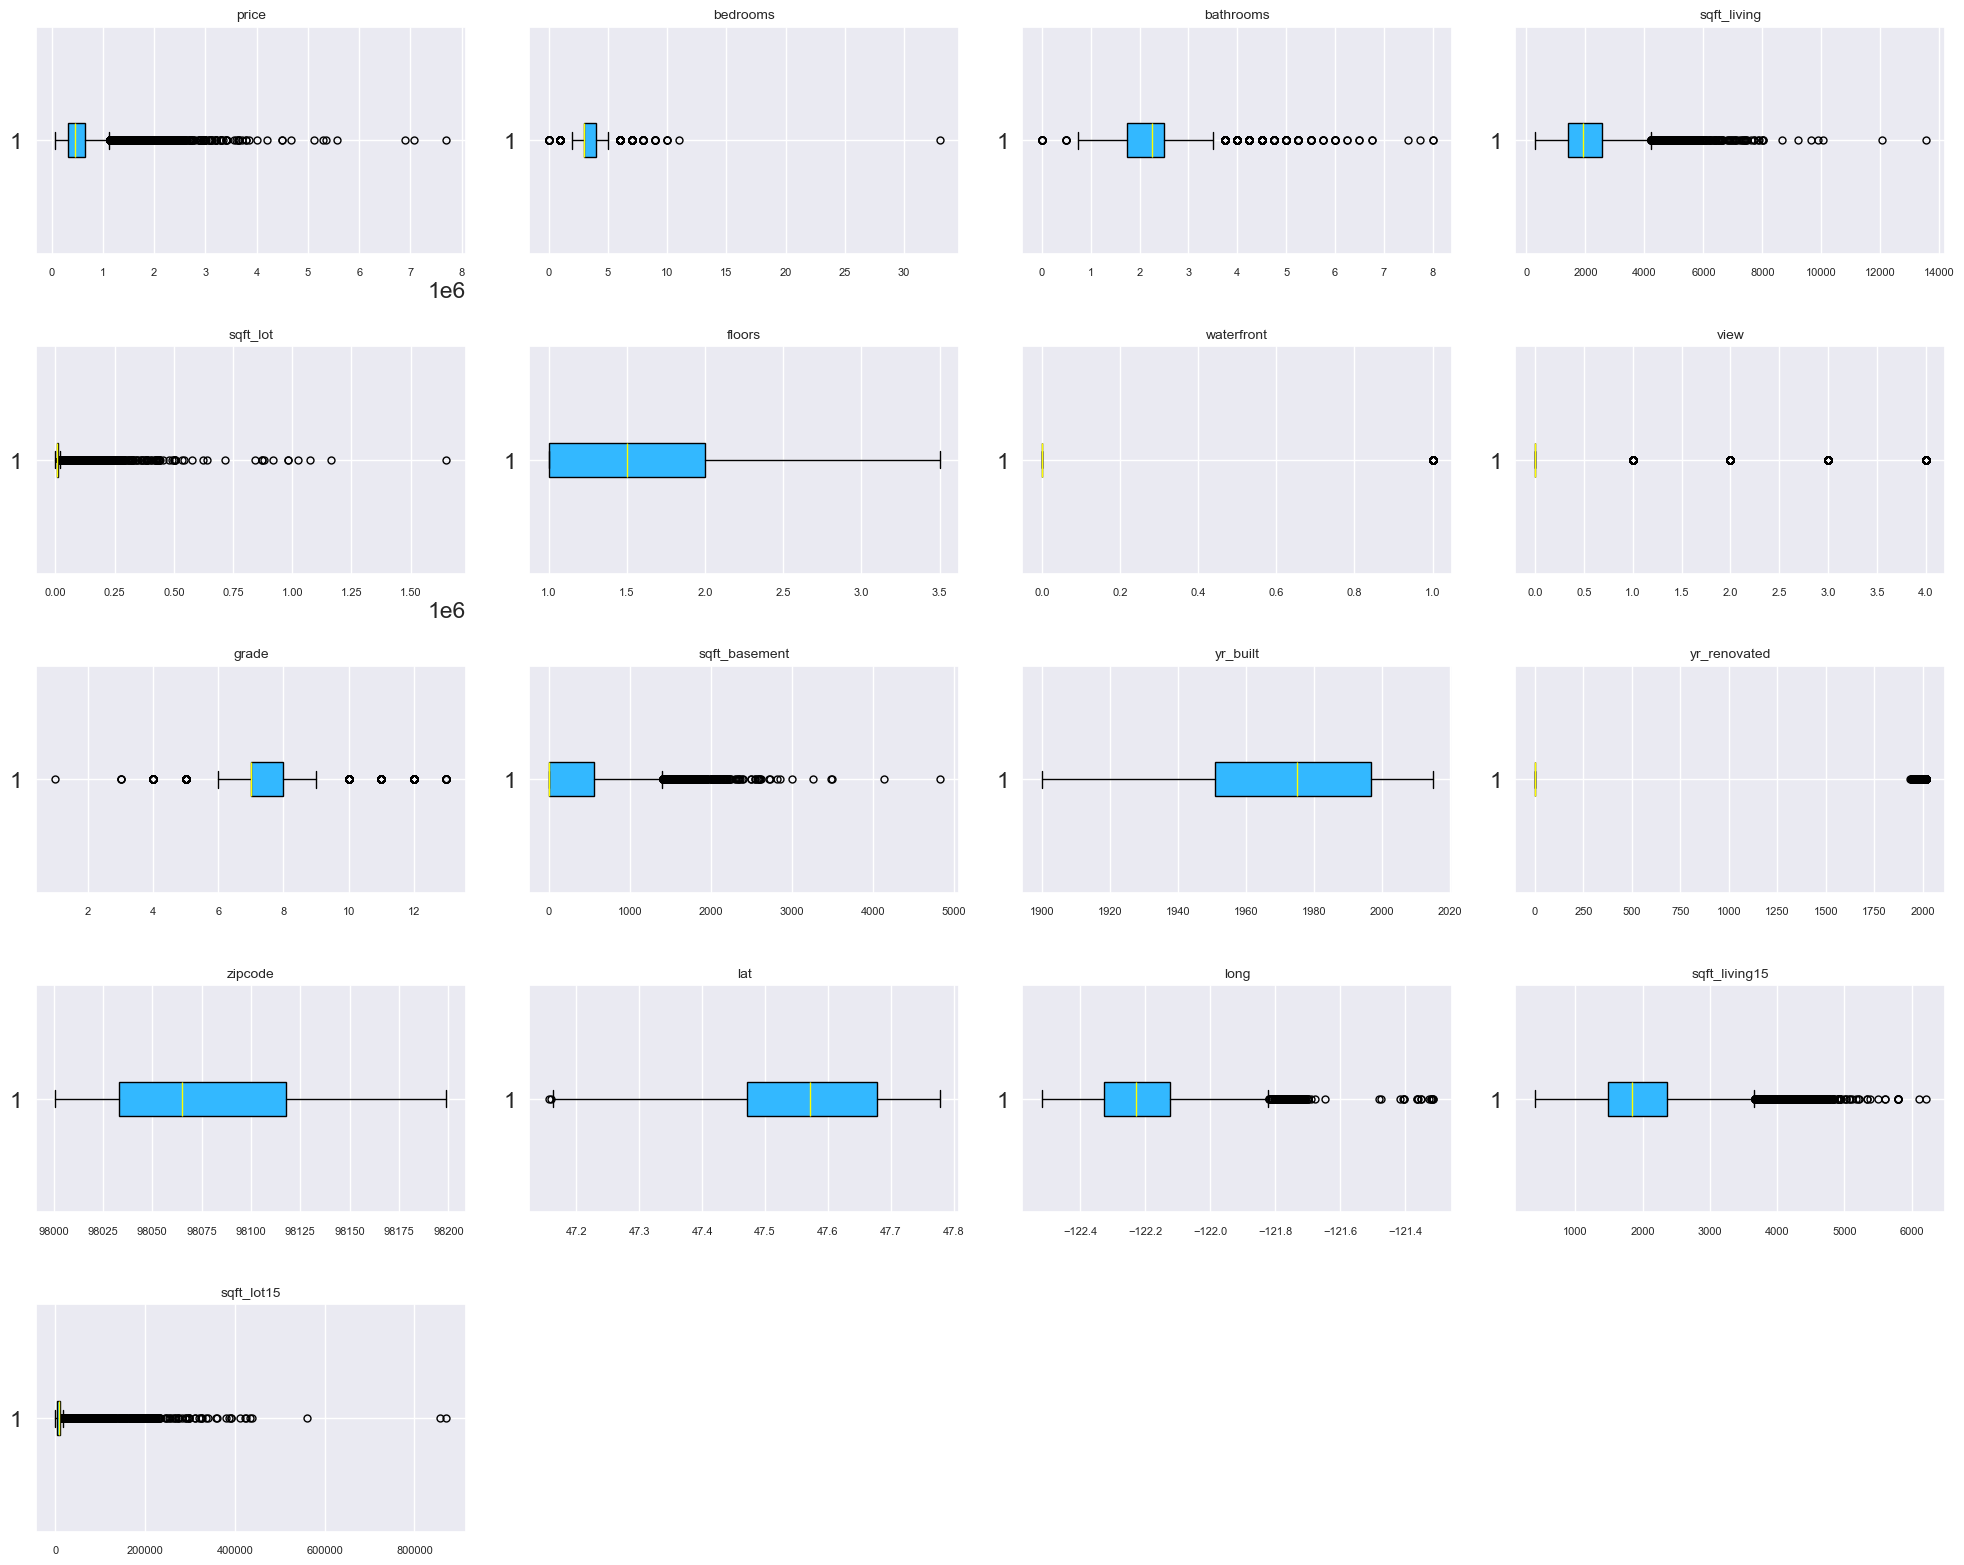

In [324]:
color = '#33b8ff'

# grid size
nrows, ncols = 5, 4 

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= len(df_above.columns):
        ax.set_visible(False)
        continue
    ax.boxplot(df_above.iloc[:, i].dropna(), vert=False, patch_artist=True, 
               boxprops=dict(facecolor=color, color='black'), 
               medianprops=dict(color='yellow'), whiskerprops=dict(color='black'), 
               capprops=dict(color='black'), flierprops=dict(marker='o', color='red', markersize=5))
    ax.set_title(df_above.columns[i], fontsize=10)
    ax.tick_params(axis='x', labelsize=8)

plt.tight_layout()
plt.show()

<h2 style="color: #33b8ff;">Linear Regression</h2>

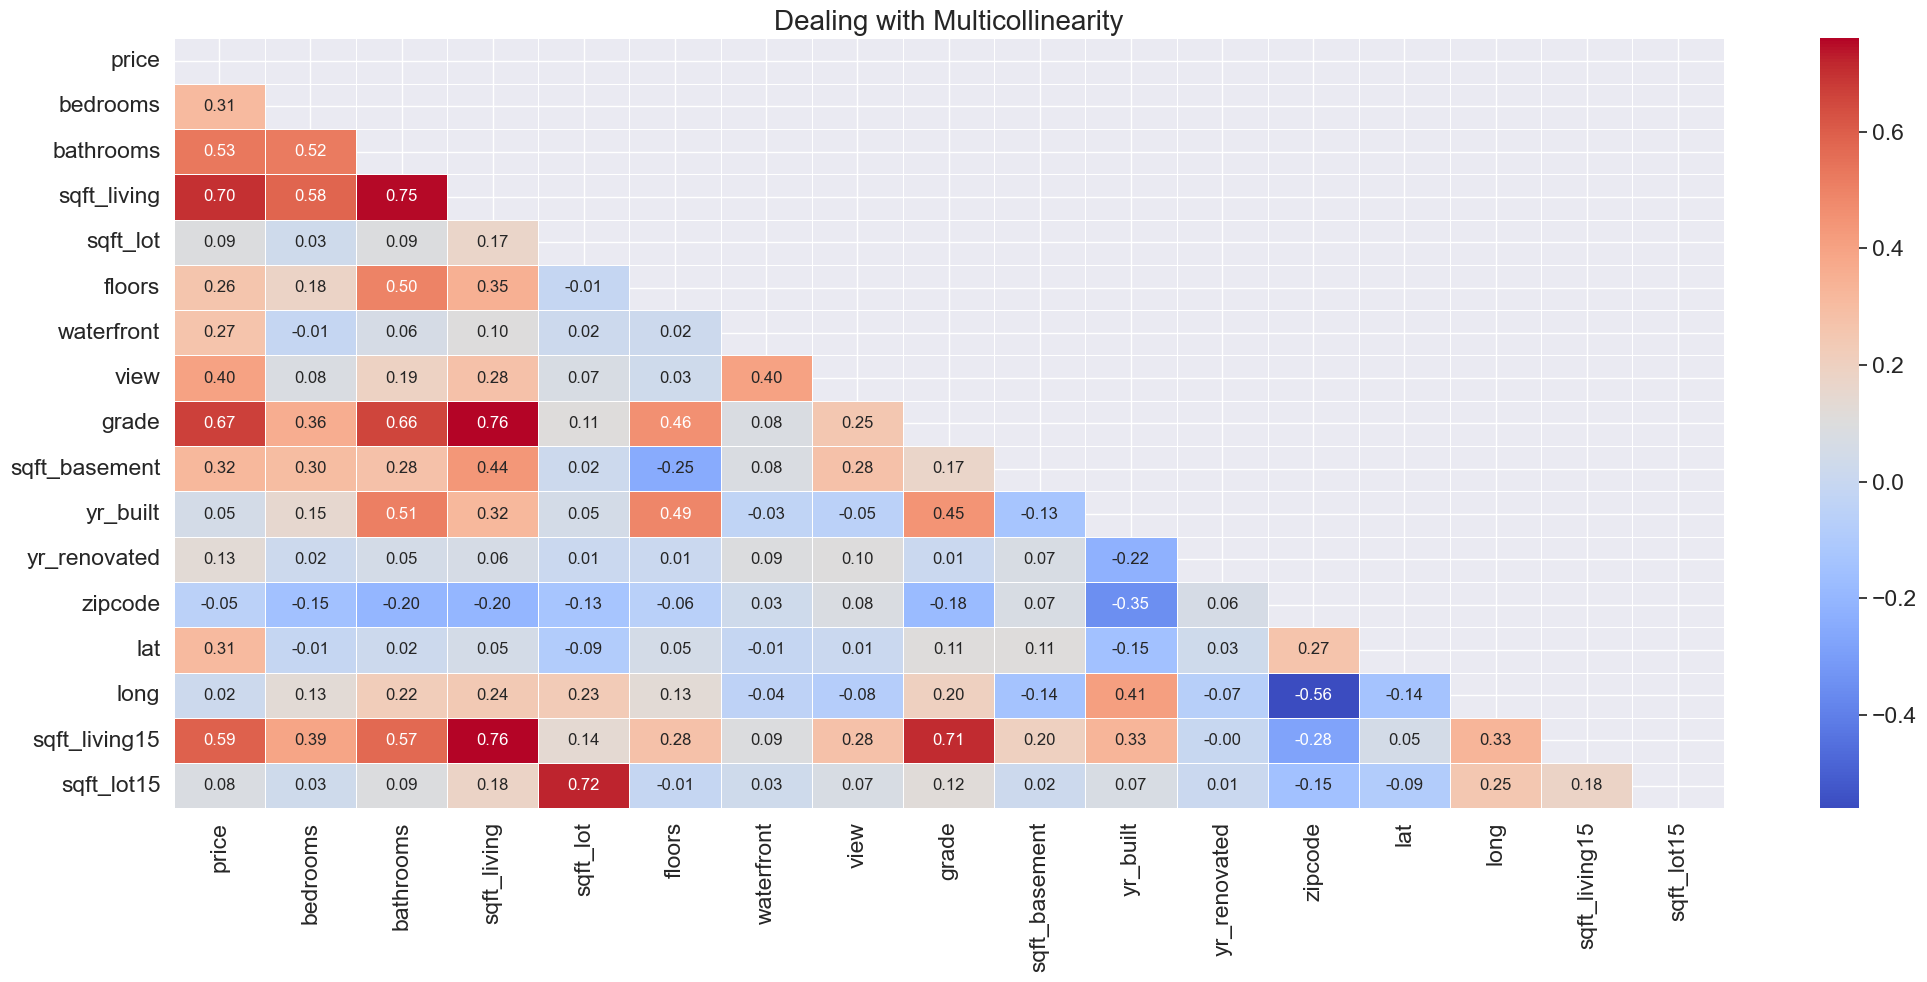

R2 =  0.6943
RMSE =  210062.4242
The value of the metric MSE is  44126222055.6002
MAE =  129017.7755


c:\Users\Darkos\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [325]:
num_corr_above = df_above.corr().round(2)

mask = np.zeros_like(num_corr_above) #para quitar los 1 con 1.
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

f, ax = plt.subplots(figsize=(25, 10))
sns.set(font_scale=1.5) # increase font size

ax = sns.heatmap(num_corr_above, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Dealing with Multicollinearity", fontsize=20) # add title
plt.show()

y= df_sinfecha["price"]
X = df_sinfecha.drop(columns = "price")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

r2_above = r2_score(y_test, predictions) 
RMSE_above = mean_squared_error(y_test, predictions, squared=False)
MSE_above = mean_squared_error(y_test, predictions)
MAE_above = mean_absolute_error(y_test, predictions)


print("R2 = ", round(r2_above, 4))
print("RMSE = ", round(RMSE_above, 4))
print("The value of the metric MSE is ", round(MSE_above, 4))
print("MAE = ", round(MAE_above, 4))

<h1 style="color: #ff3374;">08 | Analyzing the houses with a price above 650,000 </h1>

In [326]:
#DF con los precios iguales o arriba de 650000, quitando las columnas que no nos interesan.
df_650 = df_sinfecha[df_sinfecha['price'] >= 650000] 
df_650

,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,
7237550310,1225000.0,4,5420,101930,1.0,0,0,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
1736800520,662500.0,3,3560,9796,1.0,0,0,8,1860,1700,1965,0,98007,47.6007,-122.145,2210,8925
9297300055,650000.0,4,2950,5000,2.0,0,3,9,1980,970,1979,0,98126,47.5714,-122.375,2140,4000
2524049179,2000000.0,3,3050,44867,1.0,0,4,9,2330,720,1968,0,98040,47.5316,-122.233,4110,20336
1794500383,937000.0,3,2450,2691,2.0,0,0,8,1750,700,1915,0,98119,47.6386,-122.360,1760,3573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7502800100,679950.0,5,3600,9437,2.0,0,0,9,3600,0,2014,0,98059,47.4822,-122.131,3550,9421
191100405,1575000.0,4,3410,10125,2.0,0,0,10,3410,0,2007,0,98040,47.5653,-122.223,2290,10125
7202300110,810000.0,4,3990,7838,2.0,0,0,9,3990,0,2003,0,98053,47.6857,-122.046,3370,6814


<h2 style="color: #ff3374;">Checking Outliers</h2>

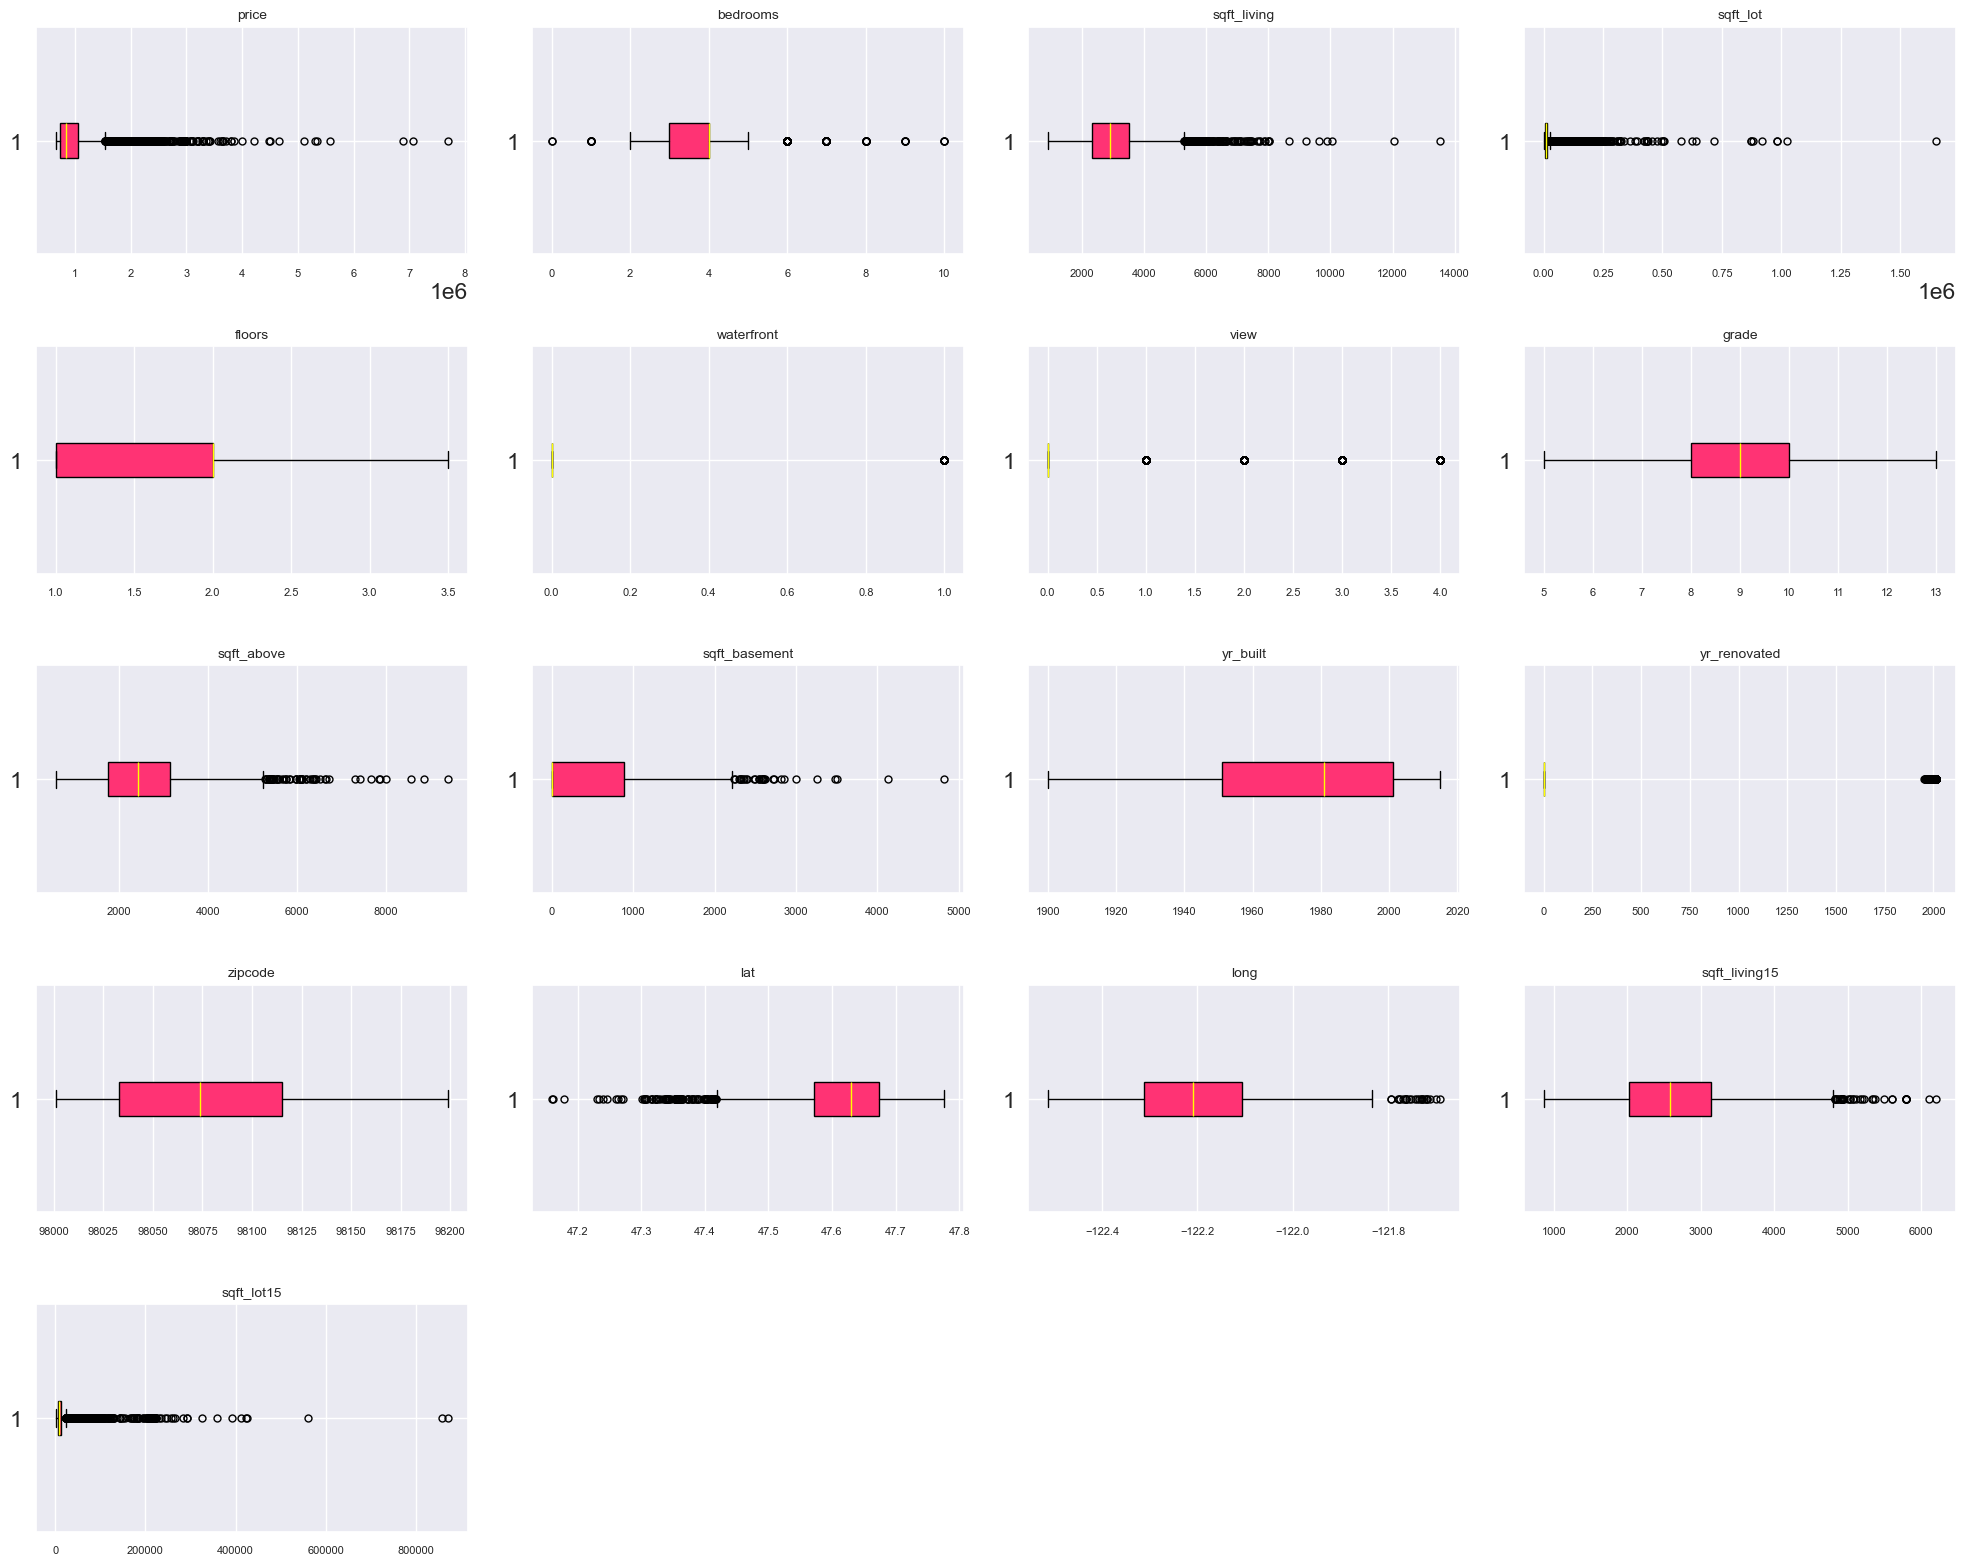

In [327]:
color = '#ff3374'

# grid size
nrows, ncols = 5, 4 

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= len(df_650.columns):
        ax.set_visible(False)
        continue
    ax.boxplot(df_650.iloc[:, i].dropna(), vert=False, patch_artist=True, 
               boxprops=dict(facecolor=color, color='black'), 
               medianprops=dict(color='yellow'), whiskerprops=dict(color='black'), 
               capprops=dict(color='black'), flierprops=dict(marker='o', color='red', markersize=5))
    ax.set_title(df_650.columns[i], fontsize=10)
    ax.tick_params(axis='x', labelsize=8)

plt.tight_layout()
plt.show()

<h2 style="color: #ff3374;">Linear Regression</h2>

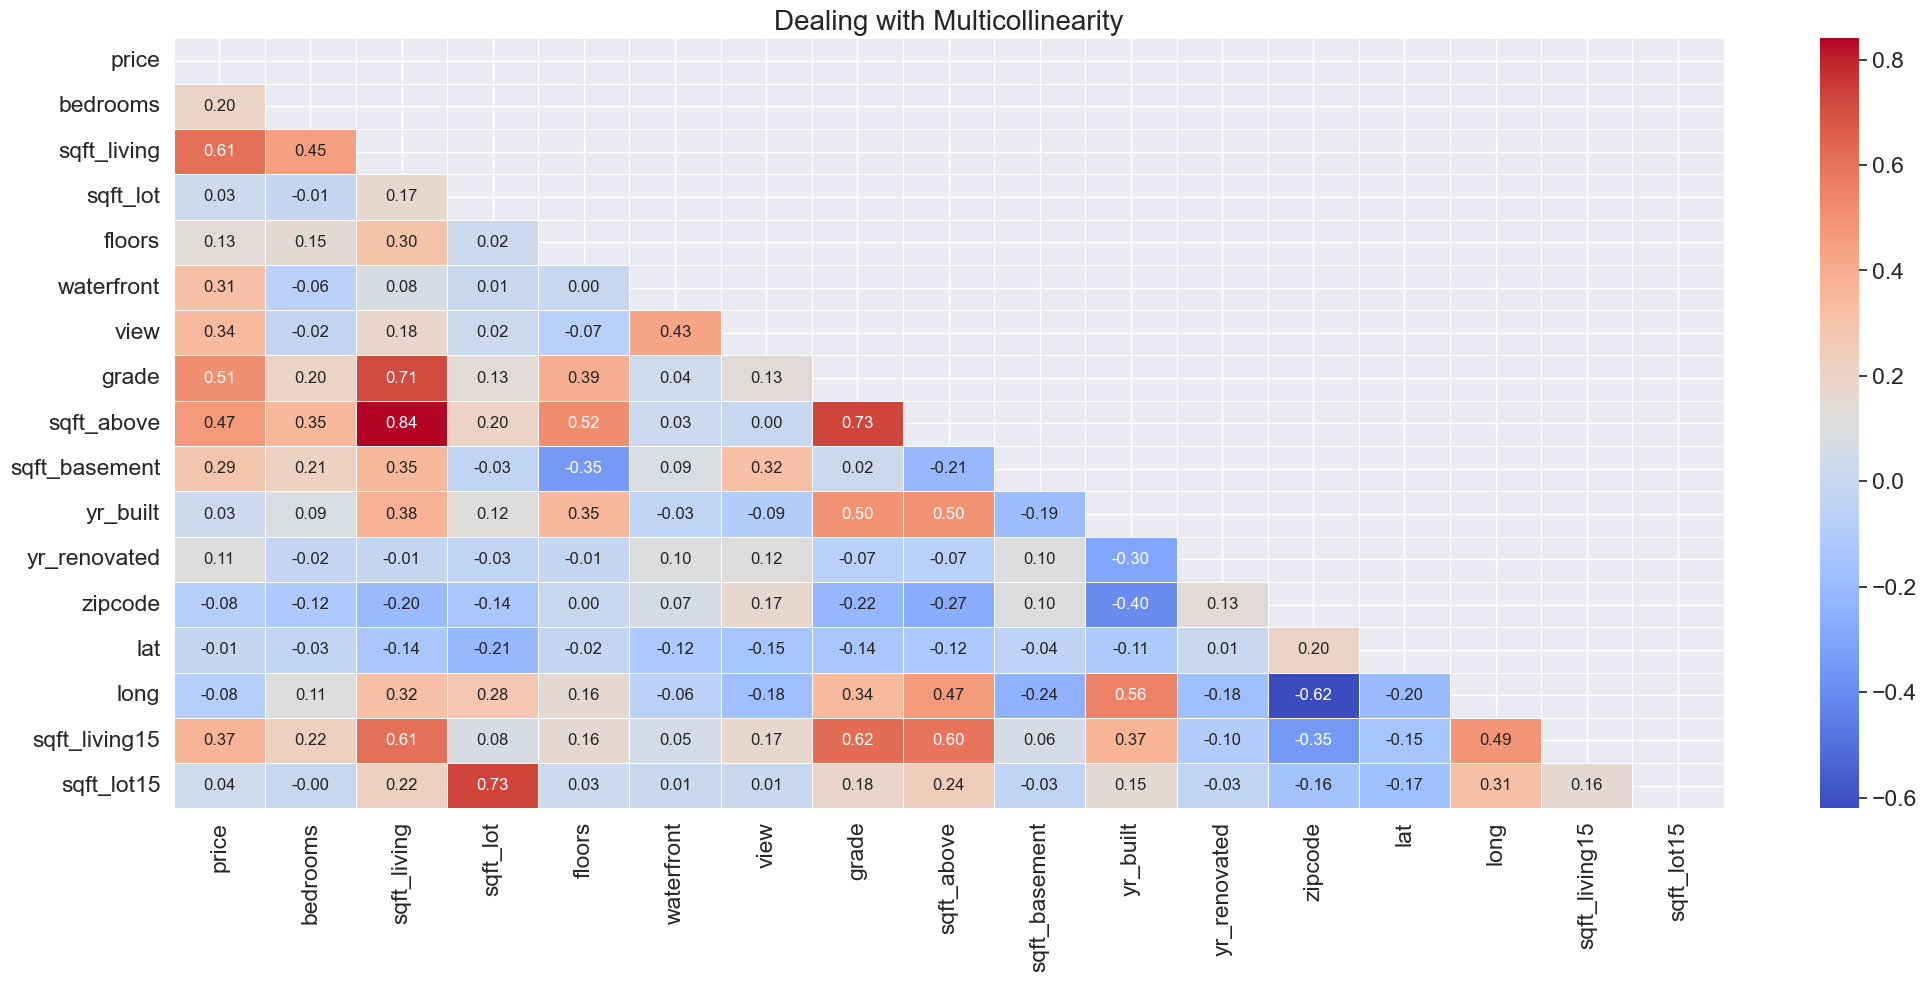

R2 =  0.6004
RMSE =  292350.0256
The value of the metric MSE is  85468537442.022
MAE =  196787.1352


c:\Users\Darkos\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [328]:
num_corr_650 = df_650.corr().round(2)

mask = np.zeros_like(num_corr_650) #para quitar los 1 con 1.
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

f, ax = plt.subplots(figsize=(25, 10))
sns.set(font_scale=1.5) # increase font size

ax = sns.heatmap(num_corr_650, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Dealing with Multicollinearity", fontsize=20) # add title
plt.show()

y= df_650["price"]
X = df_650.drop(columns = "price")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

r2_650 = r2_score(y_test, predictions) 
RMSE_650 = mean_squared_error(y_test, predictions, squared=False)
MSE_650 = mean_squared_error(y_test, predictions)
MAE_650 = mean_absolute_error(y_test, predictions)


print("R2 = ", round(r2_650, 4))
print("RMSE = ", round(RMSE_650, 4))
print("The value of the metric MSE is ", round(MSE_650, 4))
print("MAE = ", round(MAE_650, 4))

In [329]:
#Podemos ver que el Len cambio y se reduce demasiado por lo cual nuestro modelo obviamente es peor con 650, porque son muy poco datos.
print(len(df_650))
print(len(df_sinfecha))


5324
21613


<h1 style="color: #0ae255;">09 |  Final Conclusions </h1>

In [330]:
all_metrics = {
    'Model': ['Linear Regression', 'Ridge', 'Lasso', 'Decision Tree', 'KNN', 'XGBoost','MinMaxScaler ', 'StandardScaler', 'Log_Transform',"Linear_Regression_Above","Linear_Regression_650"],
    'R²': [r2, r2_ridge, r2_lasso, r2_tree, r2_knn, r2_xgb,r2_scaler, r2_xg_stand, r2_xg_log, r2_above,r2_650],
    'RMSE': [RMSE, RMSE_ridge, RMSE_lasso, RMSE_tree, RMSE_knn, RMSE_xgb,RMSE_scaler, RMSE_xg_stand, RMSE_xg_log, RMSE_above, RMSE_650],
    'MSE': [MSE, MSE_ridge, MSE_lasso, MSE_tree, MSE_knn, MSE_xgb, MSE_scaler, MSE_xg_stand, MSE_xg_log, MSE_above, MSE_650 ],
    'MAE': [MAE, MAE_ridge, MAE_lasso, MAE_tree, MAE_knn, MAE_xgb, MAE_scaler, MAE_xg_stand, MAE_xg_log,MAE_above, MAE_650 ]
}

In [331]:
df_all_metrics = pd.DataFrame(all_metrics)
df_all_metrics.set_index("Model").T

Model,Linear Regression,Ridge,Lasso,Decision Tree,KNN,XGBoost,MinMaxScaler,StandardScaler,Log_Transform,Linear_Regression_Above,Linear_Regression_650
R²,6.943459e-01,6.942521e-01,6.943428e-01,7.514731e-01,4.932111e-01,8.012900e-01,8.652865e-01,8.652865e-01,8.590927e-01,6.943459e-01,6.003667e-01
RMSE,2.100624e+05,2.100946e+05,2.100635e+05,1.894174e+05,2.704872e+05,1.693726e+05,1.394565e+05,1.394565e+05,1.426264e+05,2.100624e+05,2.923500e+05
MSE,4.412622e+10,4.413976e+10,4.412667e+10,3.587897e+10,7.316335e+10,2.868707e+10,1.944812e+10,1.944812e+10,2.034229e+10,4.412622e+10,8.546854e+10
MAE,1.290178e+05,1.290122e+05,1.290173e+05,1.018000e+05,1.649811e+05,9.747169e+04,7.325403e+04,7.325403e+04,7.504886e+04,1.290178e+05,1.967871e+05
